In [2]:
!pip install plotly

In [20]:
!pip install dataprep

     |████████████████████████████████| 1.8 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 848 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 125 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 4.5 MB/s eta 0:00:011
     |████████████████████████████████| 732 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 363 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 5.0 MB/s eta 0:00:011


     |████████████████████████████████| 432 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 7.5 MB/s eta 0:00:01
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13905 sha256=b85c9fac2451b674e3ba450636c7d492125961952a72e2f786a0a403164d54d4
  Stored in directory: /home/jovyan/.cache/pip/wheels/b2/9e/d9/26be7687b8fe36cd6cacbec34e825a3dbcd3bae54017cfb385
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp39-cp39-linux_x86_64.whl size=80156 sha256=27d919e8b5fc64c07c24d0d83d8a8b11a121897679489d11c2aa1f6cc6aaaf8b
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/4a/6c/164a1d9dd67c82d208f19d869ad0a517a0c5a6117f608c53e6
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=238a5f94116c10a5121cbe4d168d8f8e072660c6ac2764622d6f6f8153f5c899
  Stored in directory: /home/jovyan/.cache/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
  Created wheel for python-crfs

In [3]:
import numpy as np
np.random.seed(777)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          100000 non-null  int64
 1   feature_0   100000 non-null  int64
 2   feature_1   100000 non-null  int64
 3   feature_2   100000 non-null  int64
 4   feature_3   100000 non-null  int64
 5   feature_4   100000 non-null  int64
 6   feature_5   100000 non-null  int64
 7   feature_6   100000 non-null  int64
 8   feature_7   100000 non-null  int64
 9   feature_8   100000 non-null  int64
 10  feature_9   100000 non-null  int64
 11  feature_10  100000 non-null  int64
 12  feature_11  100000 non-null  int64
 13  feature_12  100000 non-null  int64
 14  feature_13  100000 non-null  int64
 15  feature_14  100000 non-null  int64
 16  feature_15  100000 non-null  int64
 17  feature_16  100000 non-null  int64
 18  feature_17  100000 non-null  int64
 19  feature_18  100000 non-null  int64
 20  featu

In [7]:
uniqueValues = train_df.nunique()
pd.set_option('display.max_rows', None)
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
id            200000
feature_0         42
feature_1         37
feature_2         48
feature_3         59
feature_4         30
feature_5         55
feature_6         40
feature_7         26
feature_8         28
feature_9         51
feature_10        32
feature_11        37
feature_12        28
feature_13        40
feature_14        30
feature_15       105
feature_16        27
feature_17        15
feature_18        21
feature_19        66
feature_20        28
feature_21        31
feature_22        55
feature_23        21
feature_24        50
feature_25        40
feature_26        20
feature_27        49
feature_28        78
feature_29        58
feature_30        18
feature_31        36
feature_32        77
feature_33        41
feature_34        31
feature_35        39
feature_36        28
feature_37        26
feature_38        39
feature_39        47
feature_40        35
feature_41        56
feature_42        42
feature_43        53
feature_44     

In [8]:
uniqueValues = test_df.nunique()
pd.set_option('display.max_rows', None)
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
id            100000
feature_0         42
feature_1         37
feature_2         48
feature_3         59
feature_4         30
feature_5         55
feature_6         40
feature_7         26
feature_8         28
feature_9         51
feature_10        32
feature_11        37
feature_12        28
feature_13        40
feature_14        30
feature_15       103
feature_16        27
feature_17        15
feature_18        21
feature_19        66
feature_20        28
feature_21        31
feature_22        55
feature_23        21
feature_24        50
feature_25        40
feature_26        20
feature_27        49
feature_28        75
feature_29        58
feature_30        18
feature_31        36
feature_32        77
feature_33        41
feature_34        31
feature_35        39
feature_36        28
feature_37        26
feature_38        39
feature_39        47
feature_40        35
feature_41        56
feature_42        42
feature_43        53
feature_44     

In [9]:
train_df.drop(['id'],axis=1).describe().T.style.bar(subset=['mean'],color=px.colors.qualitative.G10[1]).background_gradient(subset=['std'],cmap='Blues').background_gradient(subset=['50%'],cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
feature_0,200000.000000,0.972710,3.941836,0.000000,0.000000,0.000000,1.000000,61.000000
feature_1,200000.000000,1.168365,3.993407,0.000000,0.000000,0.000000,1.000000,51.000000
feature_2,200000.000000,2.219325,6.476570,0.000000,0.000000,0.000000,1.000000,64.000000
feature_3,200000.000000,2.296735,7.551858,0.000000,0.000000,0.000000,1.000000,70.000000
feature_4,200000.000000,0.793530,2.935785,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,200000.000000,1.431105,5.162746,0.000000,0.000000,0.000000,1.000000,76.000000
feature_6,200000.000000,1.010695,3.949231,0.000000,0.000000,0.000000,0.000000,43.000000
feature_7,200000.000000,0.673090,2.234949,0.000000,0.000000,0.000000,0.000000,30.000000
feature_8,200000.000000,1.943980,3.931330,0.000000,0.000000,0.000000,2.000000,38.000000
feature_9,200000.000000,1.719655,5.916988,0.000000,0.000000,0.000000,1.000000,72.000000


In [10]:
test_df.drop(['id'],axis=1).describe().T.style.bar(subset=['mean'],color=px.colors.qualitative.G10[1]).background_gradient(subset=['std'],cmap='Blues').background_gradient(subset=['50%'],cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.990510,4.018930,0.000000,0.000000,0.000000,1.000000,61.000000
feature_1,100000.000000,1.168520,4.030234,0.000000,0.000000,0.000000,1.000000,51.000000
feature_2,100000.000000,2.182730,6.402817,0.000000,0.000000,0.000000,1.000000,64.000000
feature_3,100000.000000,2.316240,7.584742,0.000000,0.000000,0.000000,1.000000,70.000000
feature_4,100000.000000,0.792050,2.938386,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,1.435520,5.164174,0.000000,0.000000,0.000000,1.000000,76.000000
feature_6,100000.000000,1.016930,3.956569,0.000000,0.000000,0.000000,0.000000,43.000000
feature_7,100000.000000,0.679780,2.262651,0.000000,0.000000,0.000000,0.000000,30.000000
feature_8,100000.000000,1.945370,3.938406,0.000000,0.000000,0.000000,2.000000,38.000000
feature_9,100000.000000,1.716100,5.876687,0.000000,0.000000,0.000000,1.000000,72.000000


In [11]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train_df.describe() - test_df.describe())[test_df.columns].T.iloc[1:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
feature_0,-0.017800,-0.077094,0.000000,0.000000,0.000000,0.000000,0.000000
feature_1,-0.000155,-0.036827,0.000000,0.000000,0.000000,0.000000,0.000000
feature_2,0.036595,0.073753,0.000000,0.000000,0.000000,0.000000,0.000000
feature_3,-0.019505,-0.032884,0.000000,0.000000,0.000000,0.000000,0.000000
feature_4,0.001480,-0.002601,0.000000,0.000000,0.000000,0.000000,0.000000
feature_5,-0.004415,-0.001428,0.000000,0.000000,0.000000,0.000000,0.000000
feature_6,-0.006235,-0.007338,0.000000,0.000000,0.000000,0.000000,0.000000
feature_7,-0.006690,-0.027703,0.000000,0.000000,0.000000,0.000000,0.000000
feature_8,-0.001390,-0.007075,0.000000,0.000000,0.000000,0.000000,0.000000
feature_9,0.003555,0.040301,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='target', ylabel='count'>

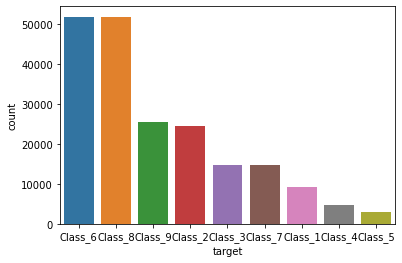

In [12]:
sns.countplot(x="target", data=train_df, order=train_df['target'].value_counts().index)

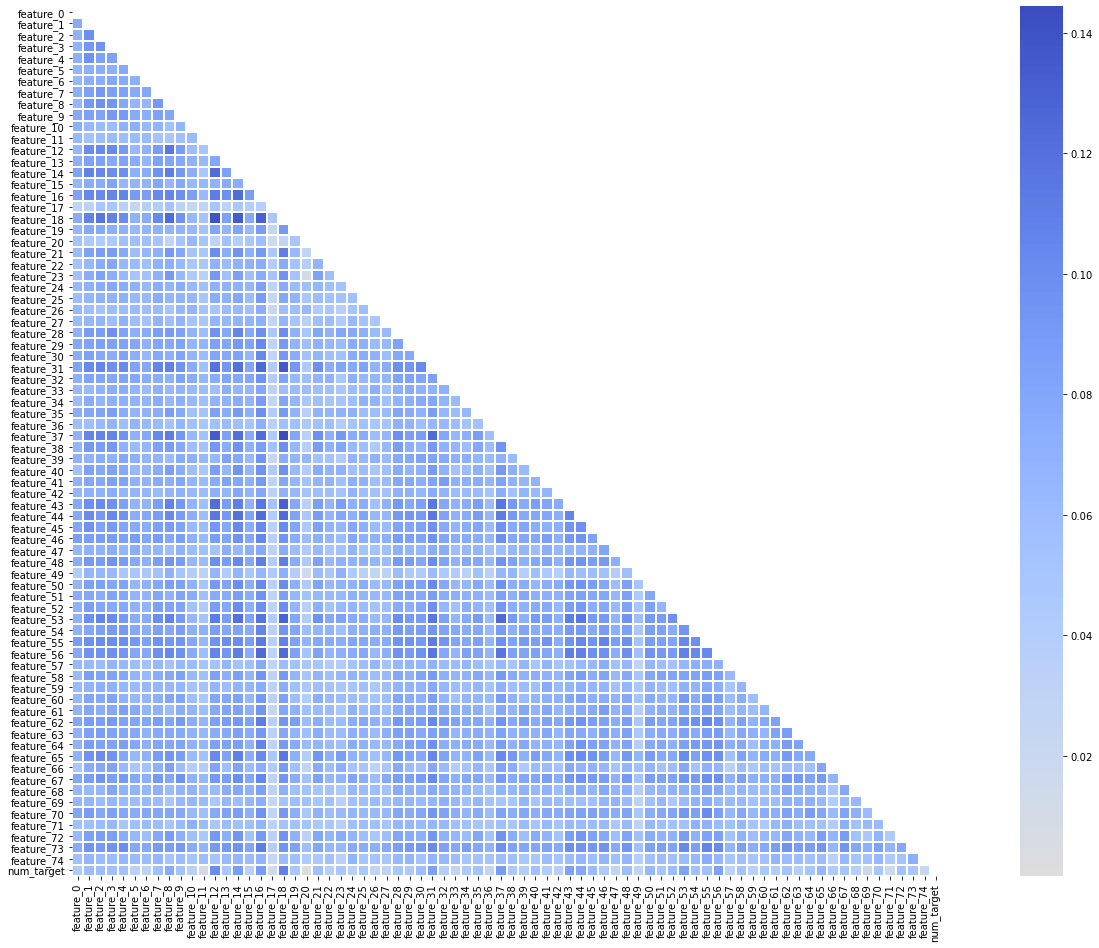

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_df['num_target'] = lb.fit_transform(train_df['target'])


fig, ax = plt.subplots(figsize=(28,16))
corr_mat = train_df.drop(["id", 'target'], axis=1).corr()
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, mask=mask, square=True, ax=ax, linewidths=0.1,center=0, cmap='coolwarm_r');

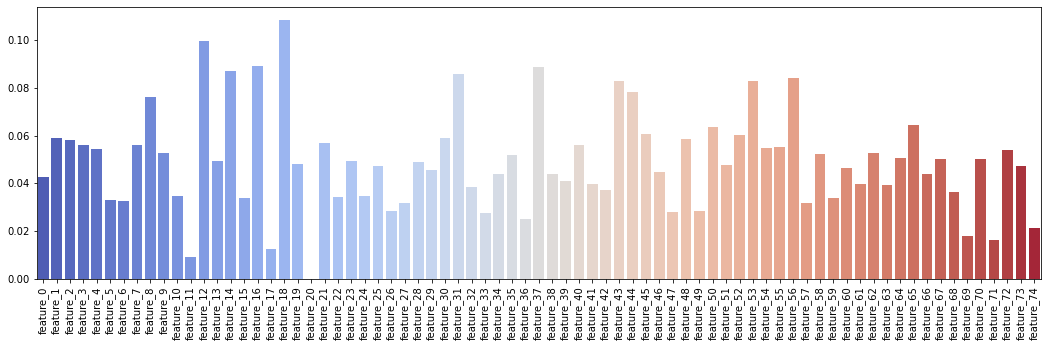

In [14]:
fig = plt.figure(figsize=(18,5))
sns.barplot(y=corr_mat['num_target'].values[:-1],x=corr_mat['num_target'].index[:-1], palette='coolwarm')
plt.xticks(rotation=90);

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


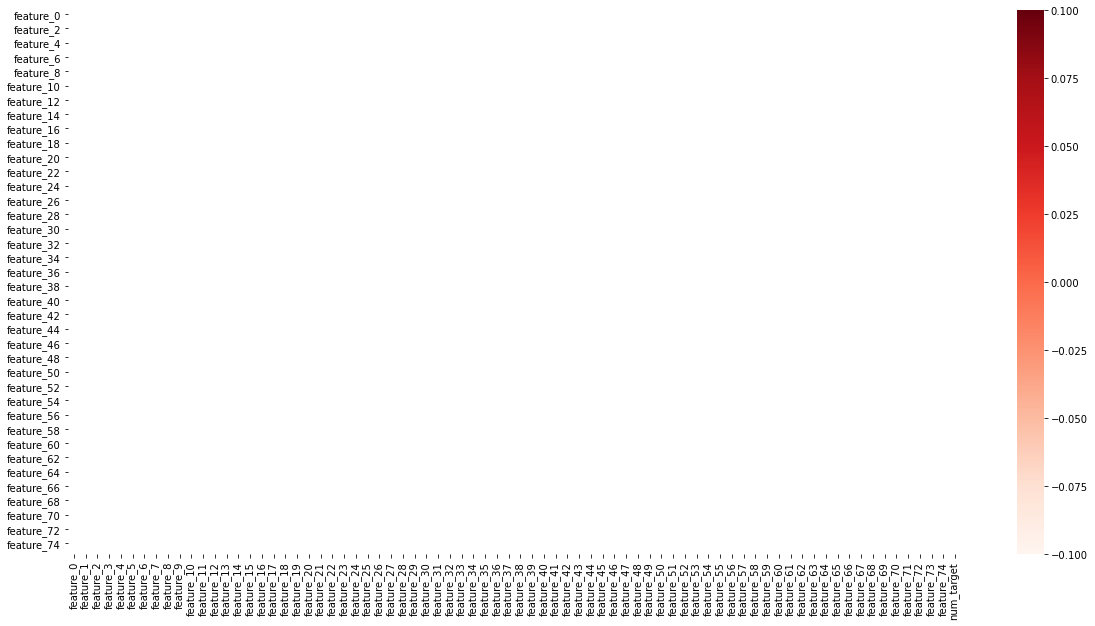

In [15]:
import seaborn as sns
min_max_corr = .8

dfCorr = train_df.drop(["id", 'target'], axis=1).corr()
filteredDf = dfCorr[((dfCorr >= min_max_corr) | (dfCorr <= -min_max_corr)) & (dfCorr !=1.000)]
plt.figure(figsize=(20, 10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [18]:
dfCorr.drop('num_target', 0).drop('num_target', 1).unstack().sort_values(ascending=False).drop_duplicates()  

feature_0   feature_0     1.000000
feature_37  feature_18    0.144435
feature_18  feature_12    0.139406
feature_31  feature_18    0.136003
feature_37  feature_12    0.133761
feature_14  feature_18    0.133747
feature_18  feature_16    0.130376
feature_43  feature_18    0.130334
feature_53  feature_18    0.127950
feature_18  feature_44    0.125170
feature_16  feature_31    0.124825
feature_56  feature_18    0.124670
feature_53  feature_37    0.124417
feature_16  feature_56    0.124274
            feature_37    0.123736
            feature_44    0.123370
feature_37  feature_31    0.123165
feature_18  feature_8     0.123026
feature_14  feature_12    0.123017
feature_12  feature_43    0.122895
feature_14  feature_16    0.122184
            feature_37    0.120916
feature_44  feature_14    0.120644
feature_14  feature_53    0.119801
feature_31  feature_14    0.119624
            feature_12    0.118032
feature_53  feature_16    0.117577
feature_31  feature_53    0.117281
            feature_

DataPrep Report
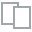
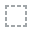
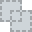
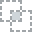
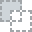
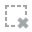
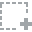
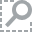
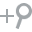
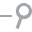
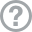
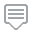
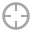
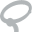
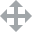
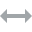
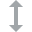
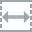
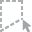
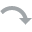
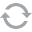
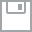
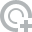
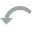
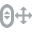
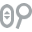
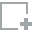
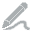
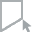
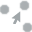
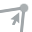
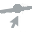

In [23]:
from dataprep import eda
eda.create_report(train_df, display=["Interactions"])

In [26]:
train_df.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54',
       'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59',
       'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64',
   

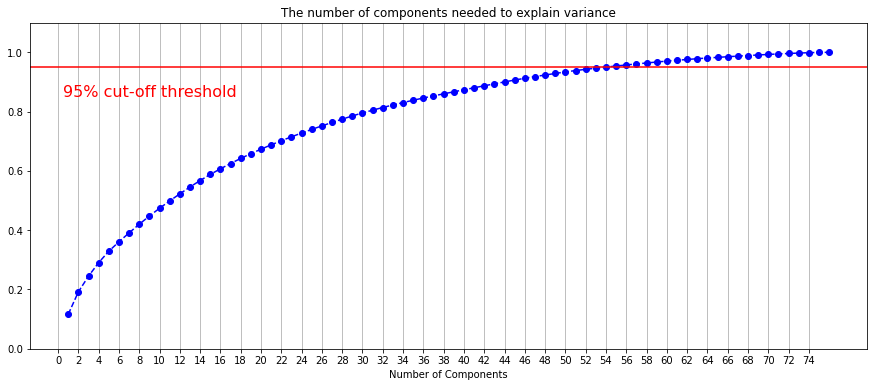

In [33]:
from sklearn.decomposition import PCA
columns_to_remove = ['target', 'id']
feature_cols = train_df.loc[:, ~train_df.columns.isin(columns_to_remove)].columns
pca = PCA().fit(train_df.drop(columns_to_remove, 1))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

fig, ax = plt.subplots()
xi = np.arange(1, len(feature_cols)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(feature_cols), step=2))

plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()